In [2]:
import numpy as np

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [8]:
file = np.loadtxt(open("data/safeway/report.csv", "rb"), delimiter=",")
sort = file[file[:,0].argsort()]
data = sort[:,1:]
labels = sort[:,0]

colors = np.empty(991, dtype='object')
colors[0:199] = "green"
colors[199:398] = "blue"
colors[398:597] = "yellow"
colors[597:796] = "orange"
colors[796:] = "red"

'''
for i in range(991):
    if labels[i] > 13.714:
        colors_.append(5)
    elif labels[i] > 11.428:
        colors_.append(4)
    elif labels[i] > 9.142:
        colors_.append(3)
    elif labels[i] > 6.856:
        colors_.append(2)
    else:
        colors_.append(1)
colors = np.array(colors_)
'''

#print(data.shape)
#print(labels.shape)
#print(colors.shape)

'\nfor i in range(991):\n    if labels[i] > 13.714:\n        colors_.append(5)\n    elif labels[i] > 11.428:\n        colors_.append(4)\n    elif labels[i] > 9.142:\n        colors_.append(3)\n    elif labels[i] > 6.856:\n        colors_.append(2)\n    else:\n        colors_.append(1)\ncolors = np.array(colors_)\n'

In [9]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

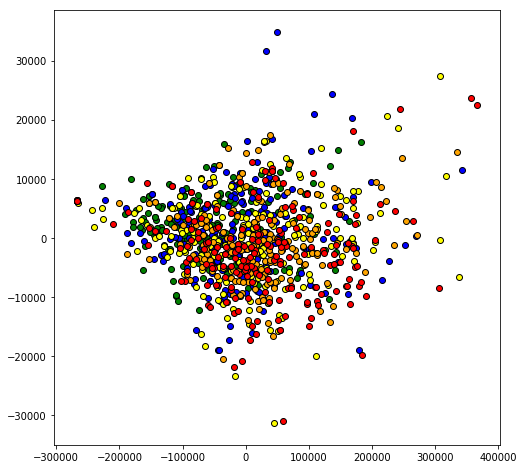

In [11]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(991):
    if labels[i] > 4.57:
        color = 'green'
    if labels[i] > 6.856:
        color = 'blue'
    if labels[i] > 9.142:
        color = 'yellow'
    if labels[i] > 11.428:
        color = 'orange'
    if labels[i] > 13.714:
        color = 'red'
    plt.scatter(data_pca[i,0],data_pca[i,1], c=colors[i], edgecolor='black', linewidth='1')
plt.show()

In [17]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=3,perplexity=30,learning_rate=200,n_iter=1000).fit_transform(data)
print(data_embedded.shape)

(991, 3)


C:\Users\Richard\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


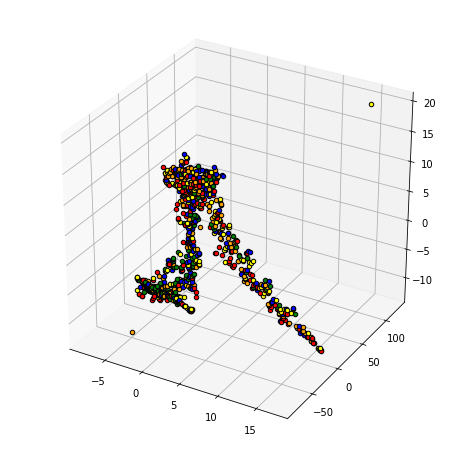

In [24]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
for i in range(991):
    if labels[i] > 4.57:
        color = 'green'
    if labels[i] > 6.856:
        color = 'blue'
    if labels[i] > 9.142:
        color = 'yellow'
    if labels[i] > 11.428:
        color = 'orange'
    if labels[i] > 13.714:
        color = 'red'
    #plt.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2] c=colors[i], edgecolor='black', linewidth='1')
    ax.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2], c=colors[i], edgecolor='black', linewidth='1')
fig.show()

In [9]:
#'''
from sklearn.metrics import silhouette_score

perplexity = [2, 5, 30, 50, 100]
learning_rate = [10, 100, 1000]
iters = [250, 500, 1000, 2000]
hp_dict = {}
j = 0
for p in perplexity:
    for lr in learning_rate:
        for i in iters:
            print(j)
            j += 1
            data_embedded = TSNE(n_components=2,perplexity=p,learning_rate=lr,n_iter=i).fit_transform(data)
            score = silhouette_score(data_embedded,colors)
            hp = str(p)+"_"+str(lr)+"_"+str(i)
            hp_dict[hp] = score
            plt.figure(figsize=(8,8))
            for i in range(991):
                plt.scatter(data_embedded[i,0],data_embedded[i,1], c=colors[i], edgecolor='black', linewidth='1')
            plt.savefig("figures/"+hp+".png")
            plt.close()
print(hp_dict)
#'''

0
1
{'1_1_250': -0.12030151, '1_2_250': -0.13775352}
